# Library

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pickle
import warnings
import kagglehub
from sklearn.decomposition import PCA

warnings.filterwarnings("ignore", category=FutureWarning, module="seaborn")
kaggle_res = kagglehub.dataset_download('maitree/wine-quality-selection')
data_url = "/root/.cache/kagglehub/datasets/maitree/wine-quality-selection/versions/1/winequality-red.csv"
print('Data source import complete.')

100%|██████████| 95.9k/95.9k [00:00<00:00, 44.4MB/s]

Extracting files...
Data source import complete.


# Load Dataset

In [2]:
df_wine = pd.read_csv(data_url)
df_wine.head(30)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


# Exploration on Dataset

In [3]:
df_wine.shape

(1599, 12)

In [4]:
df_wine.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [5]:
df_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [6]:
print(df_wine.isna().sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


In [7]:
df_wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


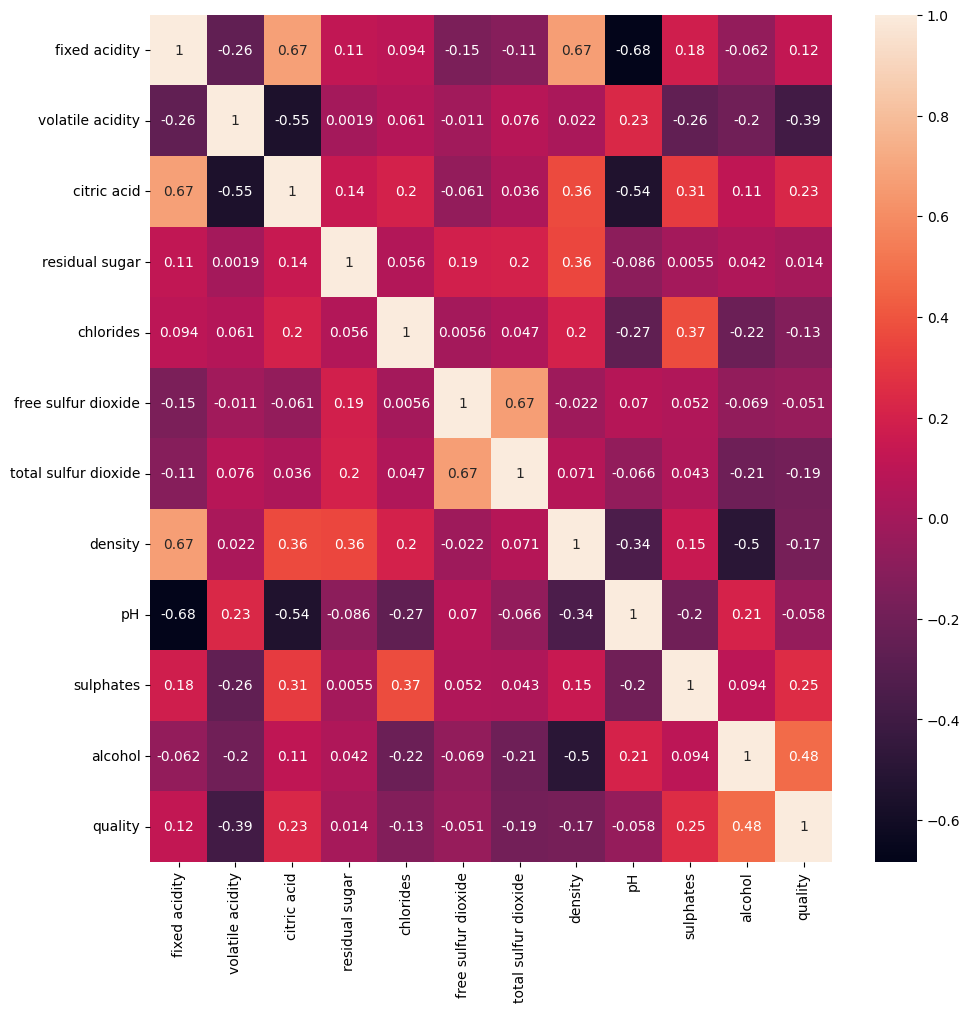

In [8]:
plt.figure(figsize=(11,11))
cor = df_wine.corr()
sns.heatmap(cor, annot=True)
plt.show()

In [9]:
df_wine_new = df_wine.copy()
df_wine_new = df_wine_new[['fixed acidity', 'citric acid', 'residual sugar','chlorides', 'density']]
# Silhouette Score = 0.7038041239018235  with K = 5
# df_wine_new = df_wine_new[['fixed acidity', 'citric acid', 'residual sugar','chlorides', 'density', 'sulphates']]
# Silhouette Score = 0.7019298291942493 with K = 5
df_wine_new.head(10)

,fixed acidity,citric acid,residual sugar,chlorides,density
0,7.4,0.00,1.9,0.076,0.9978
1,7.8,0.00,2.6,0.098,0.9968
2,7.8,0.04,2.3,0.092,0.9970
3,11.2,0.56,1.9,0.075,0.9980
4,7.4,0.00,1.9,0.076,0.9978
5,7.4,0.00,1.8,0.075,0.9978
6,7.9,0.06,1.6,0.069,0.9964
7,7.3,0.00,1.2,0.065,0.9946
8,7.8,0.02,2.0,0.073,0.9968
9,7.5,0.36,6.1,0.071,0.9978


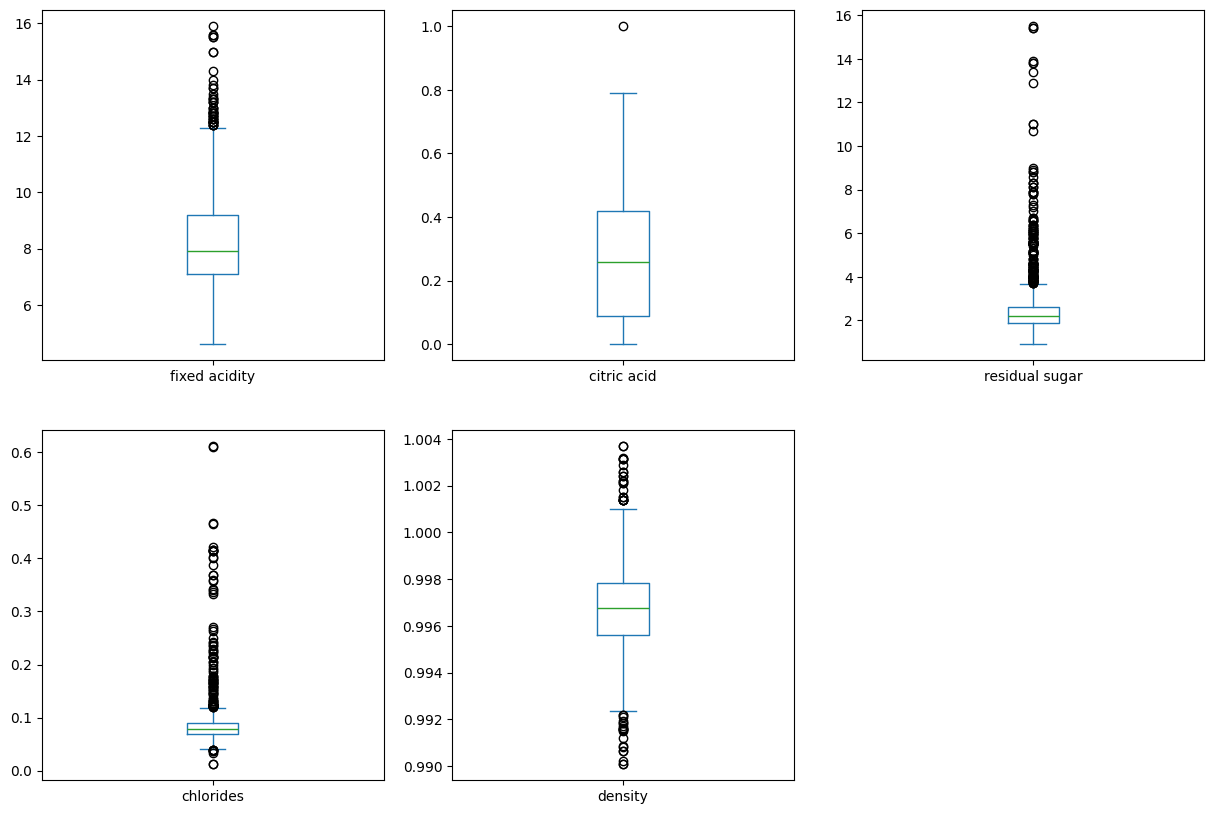

In [10]:
df_wine_new.plot(kind='box', subplots=True, layout=(2,3), sharex=False, sharey = False, figsize=(15,10))
plt.show()

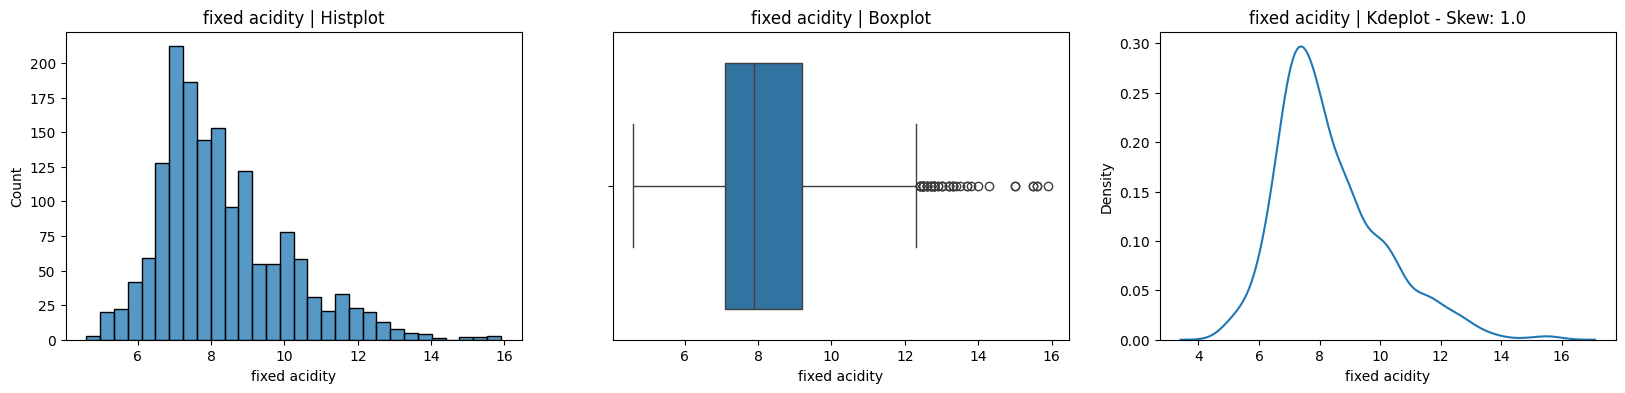

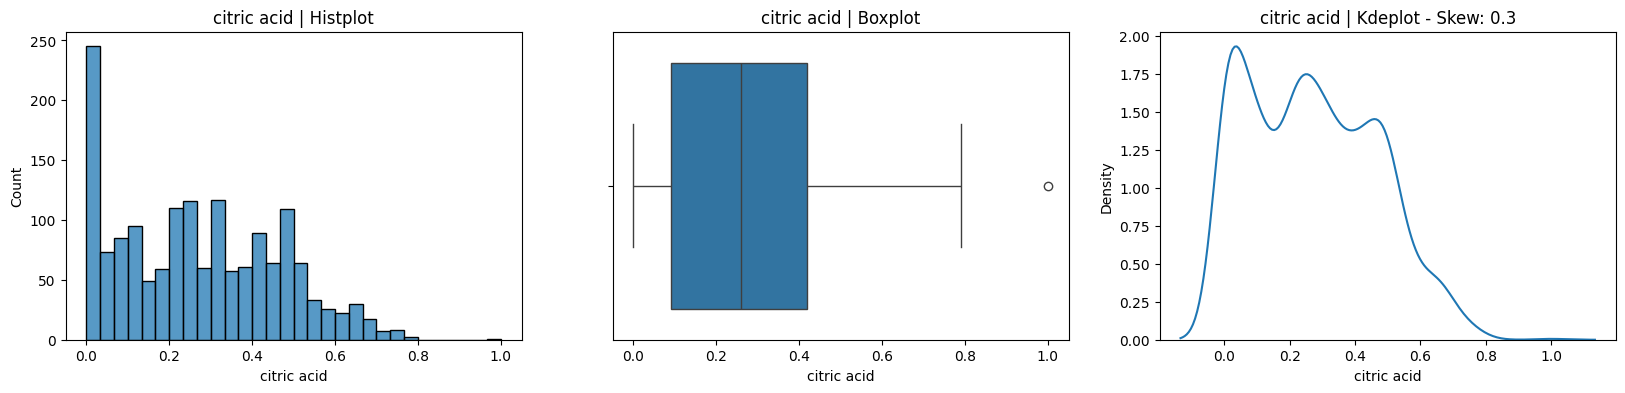

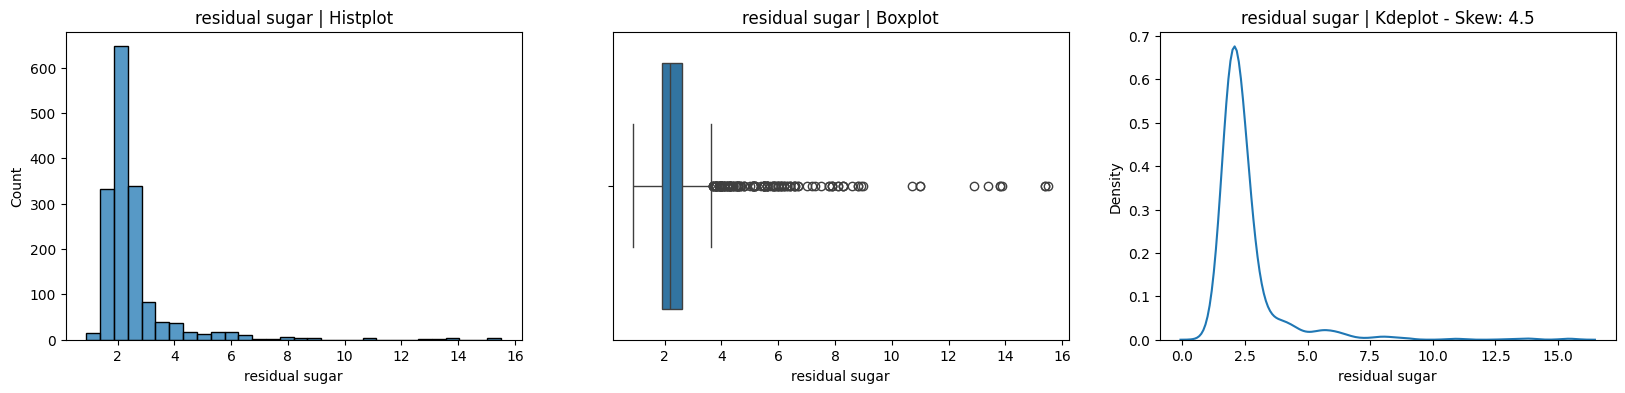

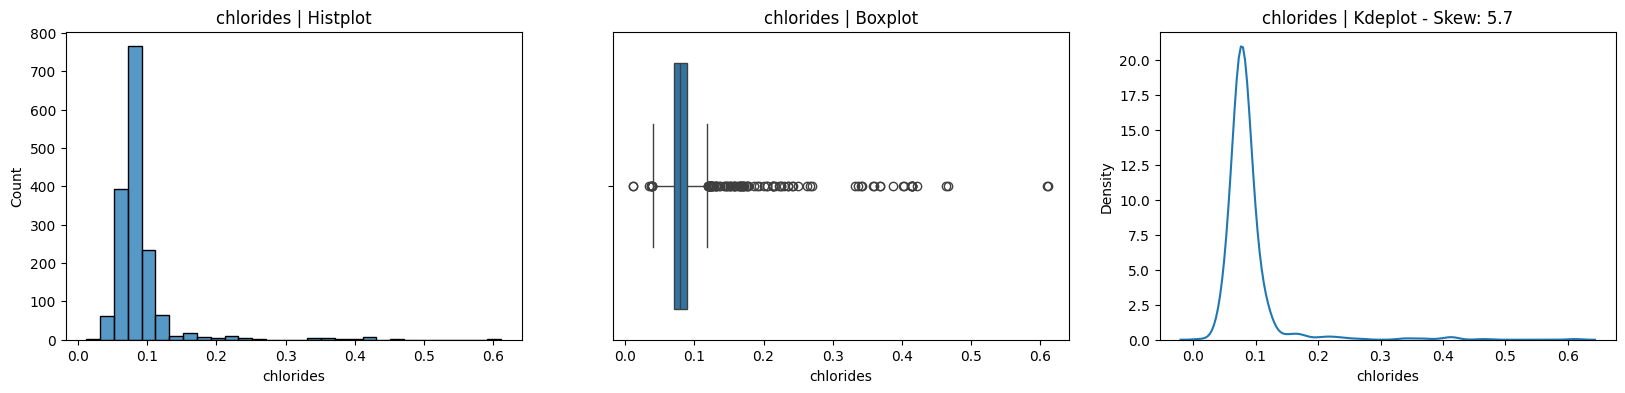

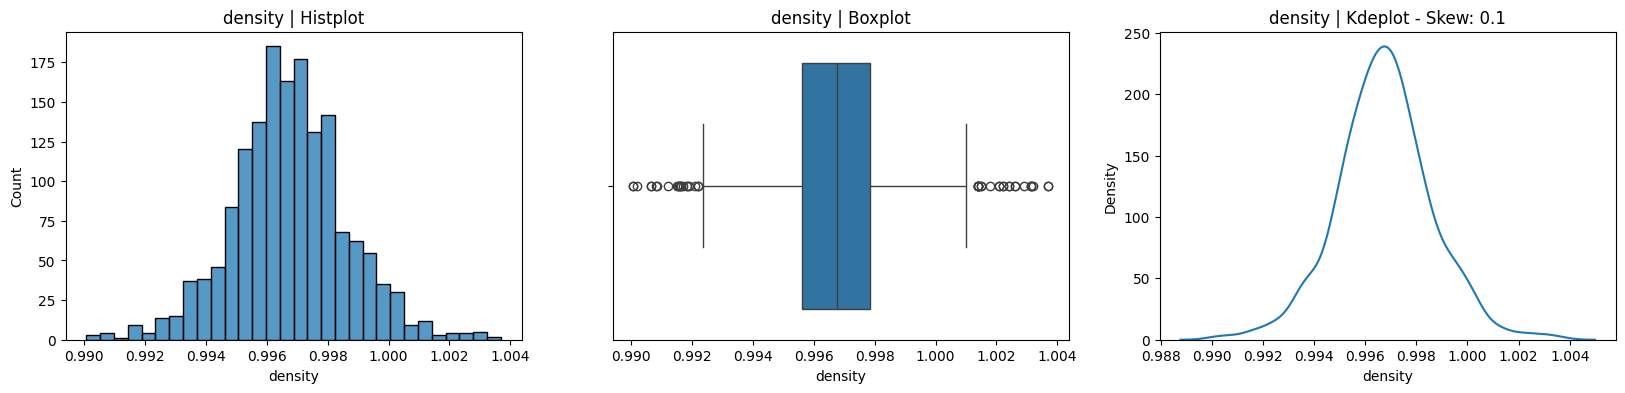

In [11]:
# df_wine_new.replace([np.inf, -np.inf], np.nan, inplace=True)
# df_wine_new.dropna(inplace=True)
for i in df_wine_new:
    fig, ax = plt.subplots(1, 3, figsize=(20,4))
    sns.histplot(x=df_wine_new[i],ax=ax[0], bins=30)
    sns.boxplot(x=df_wine_new[i], ax=ax[1])
    sns.kdeplot(df_wine_new[i], ax=ax[2])
    skew_val=round(df_wine_new[i].skew(), 1)
    ax[0].set_title(i + " | Histplot")
    ax[1].set_title(i + " | Boxplot")
    ax[2].set_title(i + " | Kdeplot - Skew: "+str(skew_val))
    plt.show()

In [12]:
def change_outlier_with_median(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    is_outlier = (df[column] < lower) | (df[column] > upper)

    median_val = df[column].median()
    df.loc[is_outlier, column] = median_val

for column in df_wine_new.columns:
    change_outlier_with_median(df_wine_new, column)


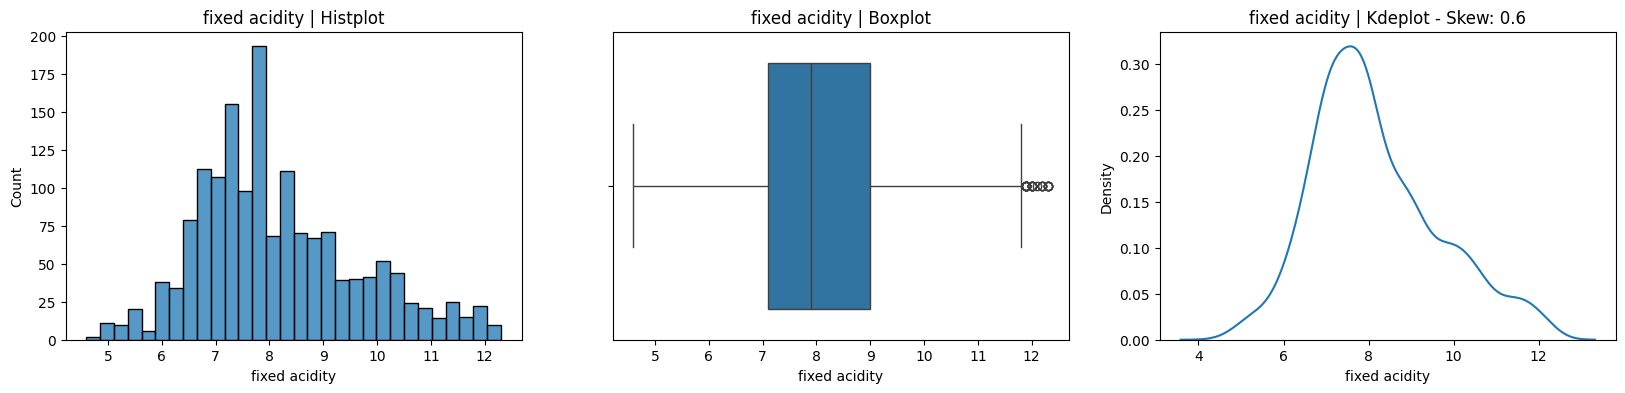

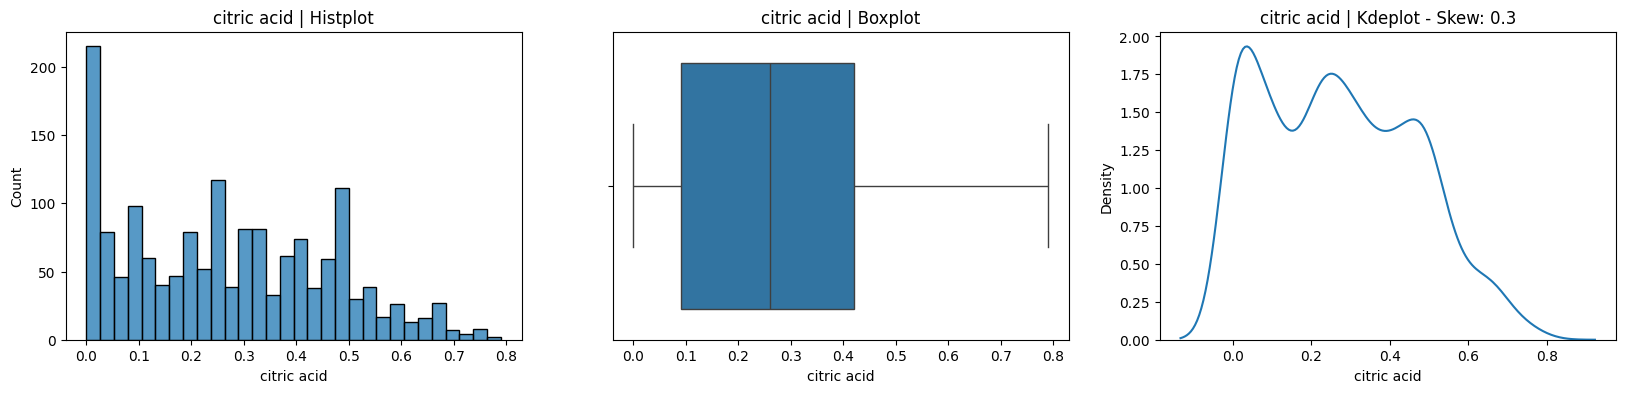

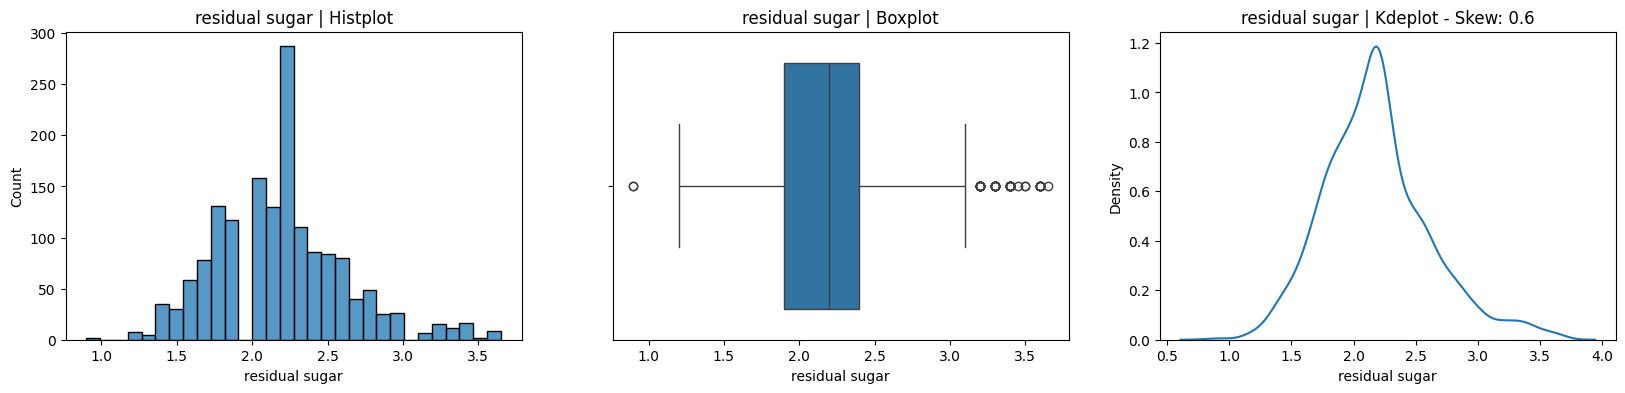

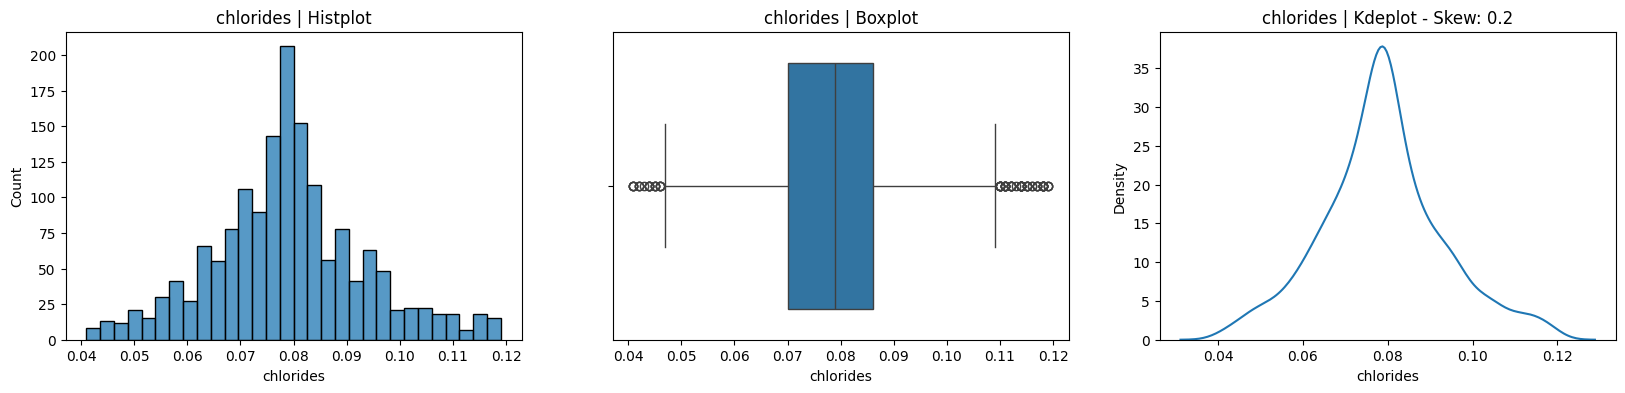

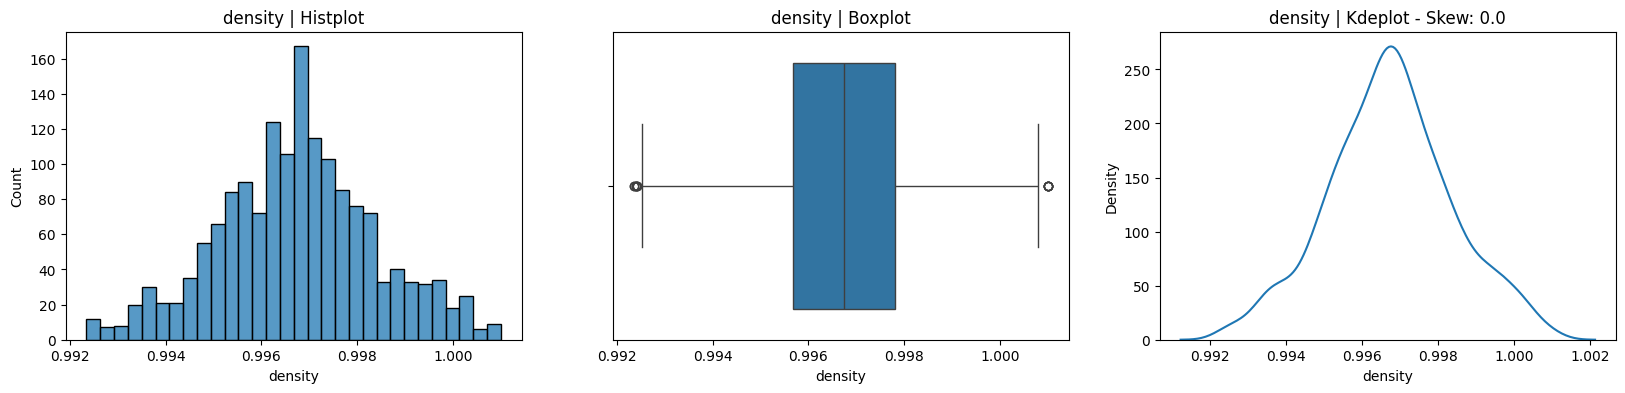

In [13]:
for i in df_wine_new:
    fig, ax = plt.subplots(1, 3, figsize=(20,4))
    sns.histplot(x=df_wine_new[i],ax=ax[0], bins=30)
    sns.boxplot(x=df_wine_new[i], ax=ax[1])
    sns.kdeplot(df_wine_new[i], ax=ax[2])
    skew_val=round(df_wine_new[i].skew(), 1)
    ax[0].set_title(i + " | Histplot")
    ax[1].set_title(i + " | Boxplot")
    ax[2].set_title(i + " | Kdeplot - Skew: "+str(skew_val))
    plt.show()

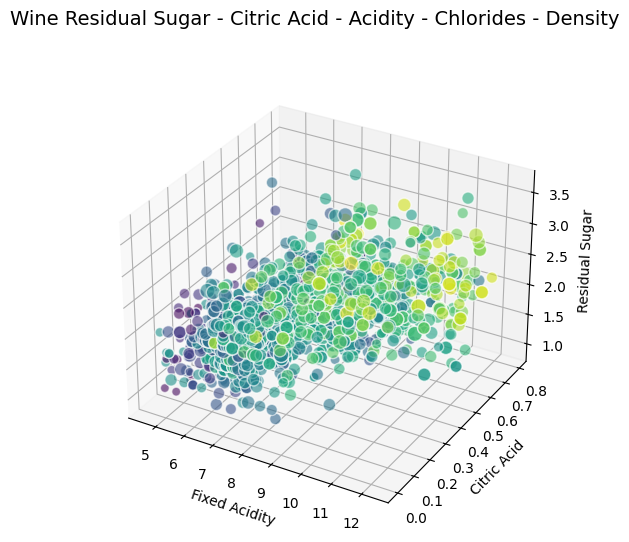

In [14]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
fig.suptitle('Wine Residual Sugar - Citric Acid - Acidity - Chlorides - Density', fontsize=14)

# Extracting data
xs = df_wine_new['fixed acidity']
ys = df_wine_new['citric acid']
zs = df_wine_new['residual sugar']
sizes = df_wine_new['chlorides'] * 1000  # Scale the sizes for visibility
colors = df_wine_new['density']  # Use density for color mapping

# Plotting scatter plot
scatter = ax.scatter(xs, ys, zs, alpha=0.6, c=colors, cmap='viridis', s=sizes, edgecolors='w')

ax.set_xlabel('Fixed Acidity')
ax.set_ylabel('Citric Acid')
ax.set_zlabel('Residual Sugar')

plt.show()


In [15]:
df_wine_proc = df_wine_new.copy()

In [16]:
SSD = {}
for k in range (1,10):
    km = KMeans(n_clusters=k, n_init='auto', init='k-means++', max_iter=1000)
    km = km.fit(df_wine_proc)
    SSD[k] = km.inertia_

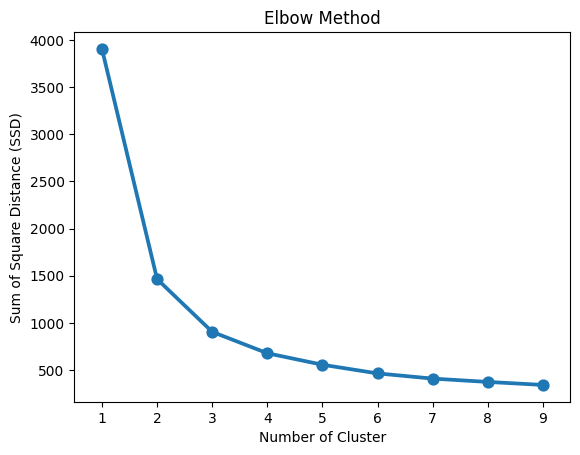

In [17]:
sns.pointplot(x=list(SSD.keys()), y=list(SSD.values()))
plt.xlabel("Number of Cluster")
plt.ylabel("Sum of Square Distance (SSD)")
plt.title("Elbow Method")
plt.show()

In [70]:
from typing_extensions import final

X_scaled = StandardScaler().fit_transform(df_wine_new)
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(X_scaled)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2', 'principal component 3'])
principalDf.head(10)

,principal component 1,principal component 2,principal component 3
0,-0.844501,0.637947,-0.400248
1,0.058818,2.095504,-0.092870
2,-0.168791,1.434227,-0.374622
3,1.856447,-1.870391,-0.528206
4,-0.844501,0.637947,-0.400248
5,-0.949259,0.490369,-0.537589
6,-1.383719,-0.385407,-0.624489
7,-2.737305,-0.832673,-1.098051
8,-0.963759,0.380388,-0.083743
9,0.146080,-0.304789,0.393718


In [72]:
Model = KMeans(n_clusters = 5, n_init='auto', init='k-means++', max_iter=1000)
Model.fit(principalDf)
label = Model.predict(principalDf)

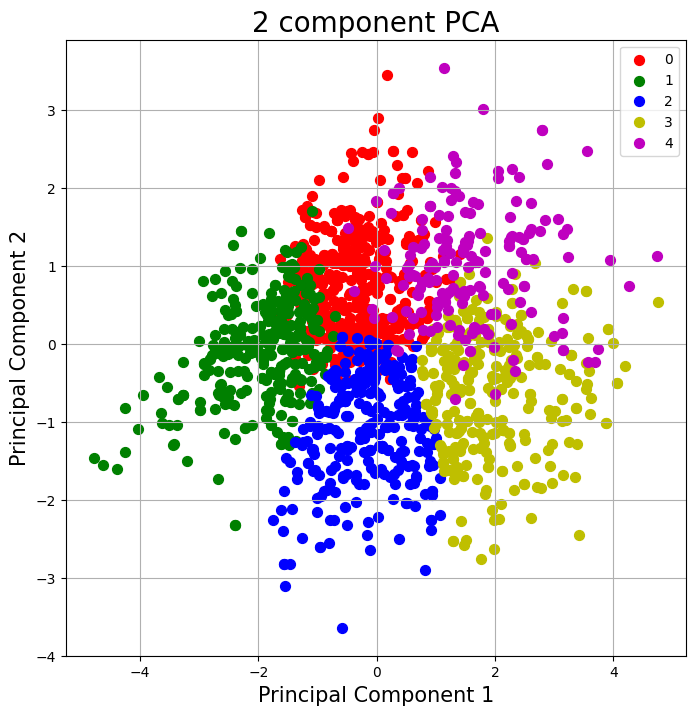

In [73]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [0, 1, 2, 3, 4]
colors = ['r', 'g', 'b', 'y', 'm']
for target, color in zip(targets, colors):
    cluster_data = principalDf[label == target]
    ax.scatter(x=cluster_data['principal component 1'],
               y=cluster_data['principal component 2'],
              #  z=
               c = color,
               s = 50)
ax.legend(targets)
ax.grid()

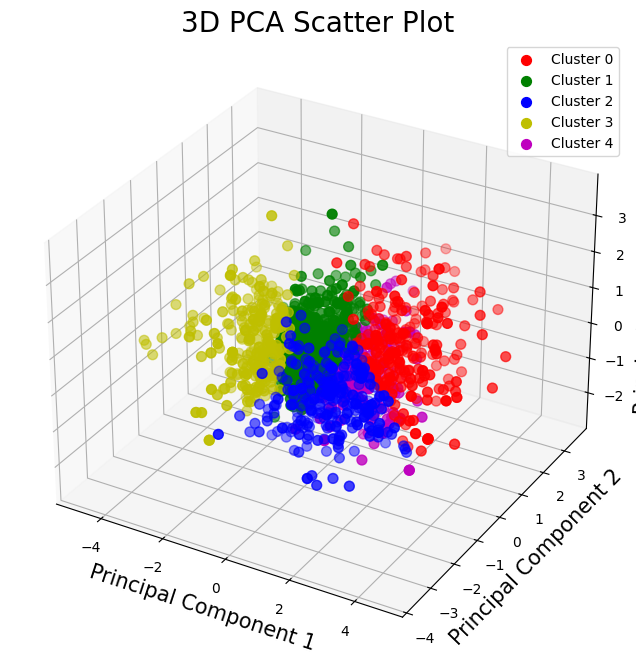

In [63]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Assuming `principalDf` contains 'principal component 1', 'principal component 2', and 'principal component 3'
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')  # 3D subplot

# Set labels and title
ax.set_xlabel('Principal Component 1', fontsize=15)
ax.set_ylabel('Principal Component 2', fontsize=15)
ax.set_zlabel('Principal Component 3', fontsize=15)
ax.set_title('3D PCA Scatter Plot', fontsize=20)

# Targets and colors
targets = [0, 1, 2, 3, 4]
colors = ['r', 'g', 'b', 'y', 'm']

# Plot each cluster
for target, color in zip(targets, colors):
    cluster_data = principalDf[label == target]  # Filter data for the target cluster
    ax.scatter(
        xs=cluster_data['principal component 1'],  # X-axis
        ys=cluster_data['principal component 2'],  # Y-axis
        zs=cluster_data['principal component 3'],  # Z-axis (third dimension)
        c=color,
        s=50,
        label=f"Cluster {target}"
    )

# Add legend and grid
ax.legend()
ax.grid()

# Show plot
plt.show()


In [61]:
import plotly.graph_objects as go

fig = go.Figure()

# Colors for clusters
colors = ['magenta', 'blue', 'red', 'green', 'yellow']

# Plotting data points for each cluster
for i in range(5):
    cluster_data = principalDf[label == i]
    fig.add_trace(go.Scatter3d(
        x=cluster_data['principal component 1'],
        y=cluster_data['principal component 2'],
        z=cluster_data['principal component 3'],
        mode='markers',
        marker=dict(size=5, color=colors[i]),
        name=f'Cluster {i + 1}'
    ))

# Plotting cluster centroids
centroids = Model.cluster_centers_
fig.add_trace(go.Scatter3d(
    x=centroids[:, 0],
    y=centroids[:, 1],
    z=centroids[:, 2],
    mode='markers+text',
    marker=dict(size=10, color='black', symbol='x'),
    text=['Centroid']*centroids.shape[0],
    textposition='top center',
    name='Centroids'
))

# Update layout
fig.update_layout(
    scene=dict(
        xaxis_title='PC1',
        yaxis_title='PC2',
        zaxis_title='PC3'
    ),
    title='3D Scatter Plot of PCA Components with Clusters',
    legend=dict(x=0, y=1)
)

# Show plot
fig.show()

In [19]:
Model = KMeans(n_clusters = 5, n_init='auto', init='k-means++', max_iter=1000)
Model.fit(df_wine_proc)

KMeans(max_iter=1000, n_clusters=5)

In [20]:
df_wine_proc['Cluster'] = Model.fit_predict(df_wine_proc)
df_wine_proc.head(10)

,fixed acidity,citric acid,residual sugar,chlorides,density,Cluster
0,7.4,0.00,1.9,0.076,0.9978,3
1,7.8,0.00,2.6,0.098,0.9968,3
2,7.8,0.04,2.3,0.092,0.9970,3
3,11.2,0.56,1.9,0.075,0.9980,2
4,7.4,0.00,1.9,0.076,0.9978,3
5,7.4,0.00,1.8,0.075,0.9978,3
6,7.9,0.06,1.6,0.069,0.9964,3
7,7.3,0.00,1.2,0.065,0.9946,3
8,7.8,0.02,2.0,0.073,0.9968,3
9,7.5,0.36,2.2,0.071,0.9978,3


In [21]:
df_wine_proc.head(50)

,fixed acidity,citric acid,residual sugar,chlorides,density,Cluster
0,7.4,0.00,1.9,0.076,0.9978,3
1,7.8,0.00,2.6,0.098,0.9968,3
2,7.8,0.04,2.3,0.092,0.9970,3
3,11.2,0.56,1.9,0.075,0.9980,2
4,7.4,0.00,1.9,0.076,0.9978,3
5,7.4,0.00,1.8,0.075,0.9978,3
6,7.9,0.06,1.6,0.069,0.9964,3
7,7.3,0.00,1.2,0.065,0.9946,3
8,7.8,0.02,2.0,0.073,0.9968,3
9,7.5,0.36,2.2,0.071,0.9978,3


In [22]:
df_wine_proc.tail(50)

,fixed acidity,citric acid,residual sugar,chlorides,density,Cluster
1549,7.4,0.30,1.8,0.074,0.99419,3
1550,7.1,0.00,2.3,0.087,0.99783,3
1551,7.1,0.00,2.3,0.083,0.99768,3
1552,6.3,0.01,2.2,0.103,0.99586,0
1553,7.3,0.00,2.2,0.080,0.99765,3
1554,6.6,0.02,2.4,0.062,0.99627,0
1555,7.0,0.17,1.7,0.065,0.99514,3
1556,6.6,0.04,2.2,0.066,0.99636,0
1557,6.6,0.02,2.4,0.062,0.99627,0
1558,6.9,0.33,2.2,0.079,0.99787,3


In [23]:
print(df_wine_proc.groupby("Cluster").size())

Cluster
0    225
1    455
2    117
3    554
4    248
dtype: int64


In [24]:
labels = Model.labels_
centroids = Model.cluster_centers_

In [25]:
silhouette_score(df_wine_proc, labels)

0.6933234152551502

In [26]:
Silhouette_score = {}
for k in range (2,8):
    km = KMeans(n_clusters=k, n_init='auto', init='k-means++', max_iter=1000)
    km = km.fit(df_wine_proc)
    Silhouette_score[k] = silhouette_score(df_wine_proc, km.labels_)

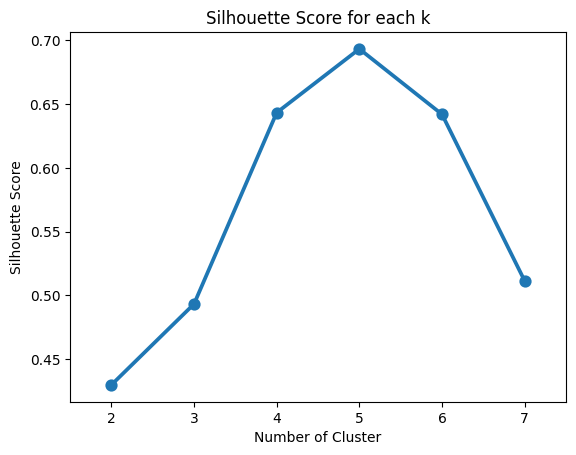

In [27]:
sns.pointplot(x=list(Silhouette_score.keys()), y=list(Silhouette_score.values()))
plt.xlabel("Number of Cluster")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score for each k")
plt.show()

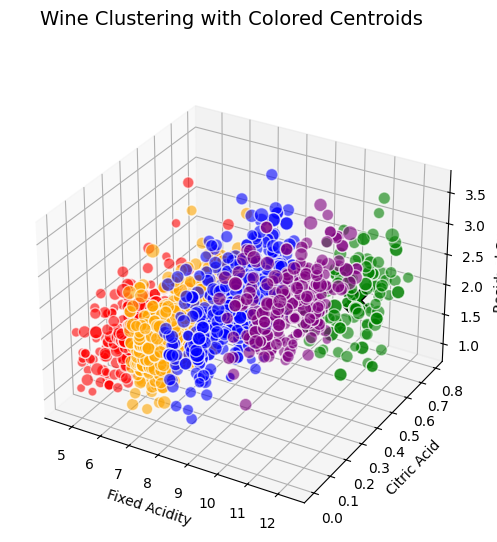

In [28]:
colors = ['red', 'blue', 'green', 'orange', 'purple']

# Begin plotting
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
fig.suptitle('Wine Clustering with Colored Centroids', fontsize=14)

# Plot each cluster separately with its unique color
for cluster_id, color in enumerate(colors):
    cluster_data = df_wine_proc[df_wine_proc['Cluster'] == cluster_id]
    xs = cluster_data['fixed acidity']
    ys = cluster_data['citric acid']
    zs = cluster_data['residual sugar']
    sizes = cluster_data['chlorides'] * 1000  # Bubble sizes

    # Scatter plot for points in the cluster
    ax.scatter(xs, ys, zs, alpha=0.6, c=color, s=sizes, edgecolors='w', label=f'Cluster {cluster_id + 1}')

    # Plot the centroid for the cluster
    centroid_x, centroid_y, centroid_z = centroids[cluster_id, :3]
    ax.scatter(centroid_x, centroid_y, centroid_z, c=color, s=300, marker='X', edgecolors='black', label=f'Centroid {cluster_id + 1}')

# Adding labels
ax.set_xlabel('Fixed Acidity')
ax.set_ylabel('Citric Acid')
ax.set_zlabel('Residual Sugar')

plt.show()

In [29]:
with open("model_kmean.pkl", "wb") as model_file:
    pickle.dump(Model, model_file)

In [30]:
with open("model_kmean.pkl", "rb") as model_file:
    Loaded_model = pickle.load(model_file)

In [31]:
new_data = [[0.8, 0.00, 1.2, 70.065, 0.9946], [10.8, 0.15, 1.8, 0.118, 22.99540]]
new_data = pd.DataFrame(new_data, columns=df_wine_new.columns)
Loaded_model.predict(new_data)

array([0, 2], dtype=int32)

In [32]:
new_data

,fixed acidity,citric acid,residual sugar,chlorides,density
0,0.8,0.00,1.2,70.065,0.9946
1,10.8,0.15,1.8,0.118,22.9954


In [33]:
# X_kmean = df_wine_proc.drop('Cluster', axis=1)
# y_kmean = df_wine_proc['Cluster']

# # Generate a random dataset
# X_kmean, y_kmean = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

# # Split the dataset into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X_kmean, y_kmean, test_size=0.2, random_state=42)

# # Create a Random Forest Classifier
# rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# # Train the model
# rf_classifier.fit(X_train, y_train)

# # Make predictions on the test set
# y_pred = rf_classifier.predict(X_test)

# # Calculate the accuracy
# accuracy = accuracy_score(y_test, y_pred)
# print(f"Accuracy: {accuracy:.2f}")